<a href="https://colab.research.google.com/github/dkd99/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [191]:
df=pd.read_csv('/content/drive/MyDrive/csv files/SeoulBikeData.csv',encoding='unicode_escape')

In [192]:
df.shape

(8760, 14)

In [193]:
len(df[df['Date']==''])

0

In [194]:
df['Date']=df['Date'].apply(lambda x : datetime.strptime(x,'%d/%m/%Y'))

In [195]:
df['month']=df['Date'].dt.month

In [196]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [198]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000


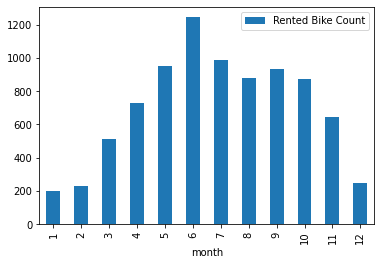

In [199]:
df.groupby(df['month']).aggregate({'Rented Bike Count':'mean'}).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


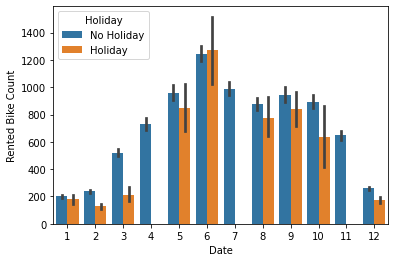

In [200]:
sns.barplot(df['Date'].dt.month,'Rented Bike Count',data=df,hue='Holiday')

In [201]:
numeric_features=df.describe().columns.tolist()

In [202]:
numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'month']

In [203]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
dtype: int64

In [204]:
df['Date'].value_counts().sort_values()

2017-12-01    24
2017-12-05    24
2017-12-06    24
2017-12-07    24
2017-12-08    24
              ..
2018-11-29    24
2018-11-10    24
2018-09-03    24
2018-11-07    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Total rented bike in respective hour'),
 Text(0.5, 0, 'time of day'),
 Text(0.5, 1.0, 'Demand wrt time of day')]

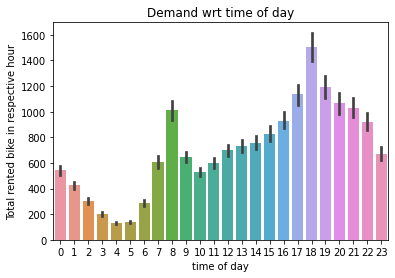

In [205]:
sns.barplot('Hour','Rented Bike Count',data=df).set(title='Demand wrt time of day',xlabel='time of day',ylabel='Total rented bike in respective hour')

In [206]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [207]:
df.groupby('Seasons').aggregate({'Rented Bike Count':'mean'})

,Rented Bike Count
Seasons,
Autumn,819.597985
Spring,730.031250
Summer,1034.073370
Winter,225.541204


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


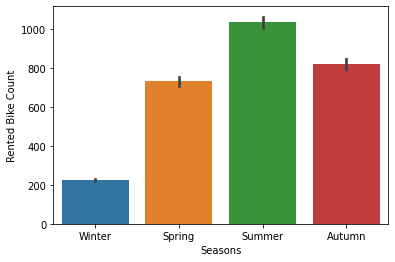

In [208]:
sns.barplot('Seasons','Rented Bike Count',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


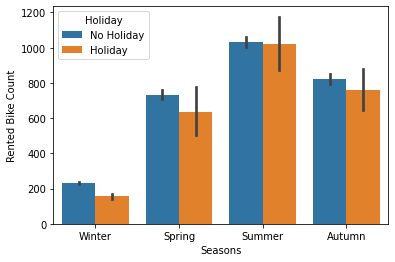

In [209]:
sns.barplot('Seasons','Rented Bike Count',data=df,hue='Holiday')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'avg rented bikes on holidays vs no holidays')]

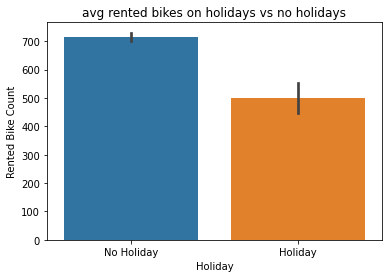

In [210]:
sns.barplot('Holiday','Rented Bike Count',data=df).set(title='avg rented bikes on holidays vs no holidays')

In [211]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month'],
      dtype='object')

In [212]:
df['Date'].dt.dayofweek

0       4
1       4
2       4
3       4
4       4
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: Date, Length: 8760, dtype: int64

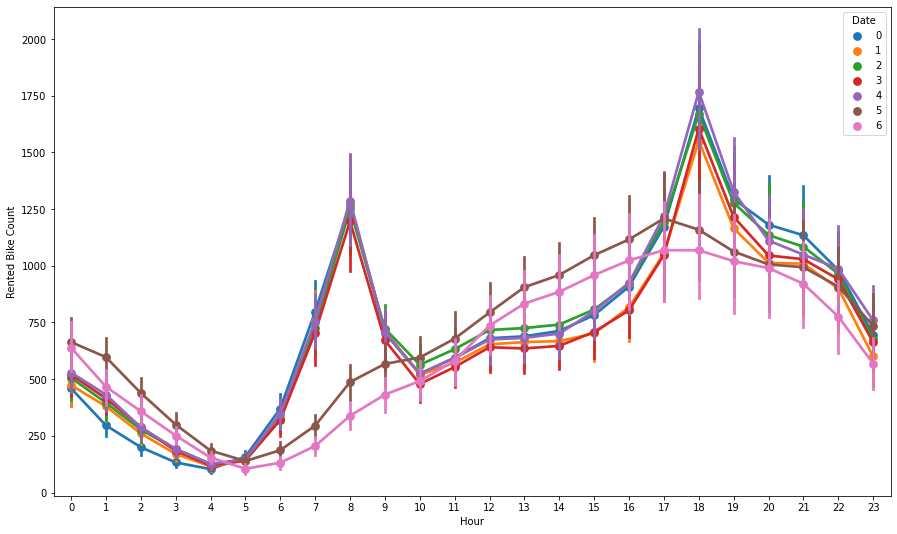

In [213]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Hour',y='Rented Bike Count',data=df,hue=df['Date'].dt.dayofweek)

[Text(0.5, 1.0, 'avg rented bikes on holidays vs no holidays')]

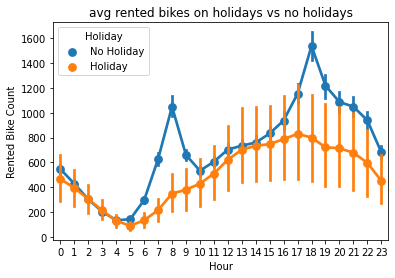

In [214]:
sns.pointplot(x='Hour',y='Rented Bike Count',data=df,hue='Holiday').set(title='avg rented bikes on holidays vs no holidays')

In [215]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month'],
      dtype='object')

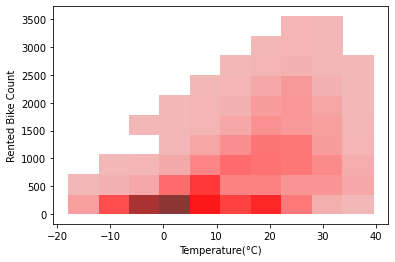

In [216]:
sns.histplot(data=df,x='Temperature(°C)',y='Rented Bike Count',bins=10,color='red',)



In [217]:
print(numeric_features,end='')

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month']

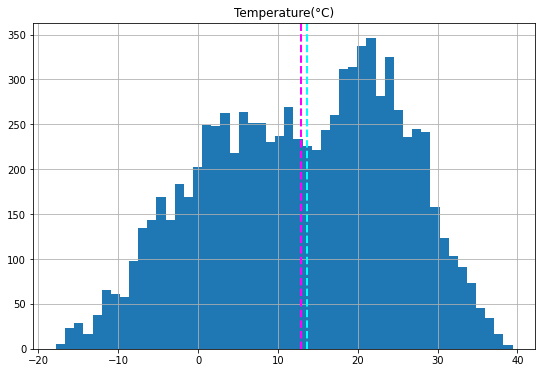

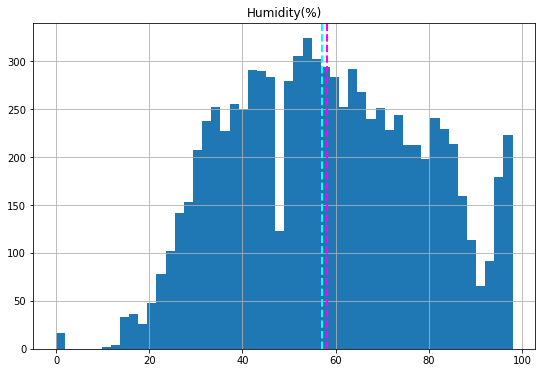

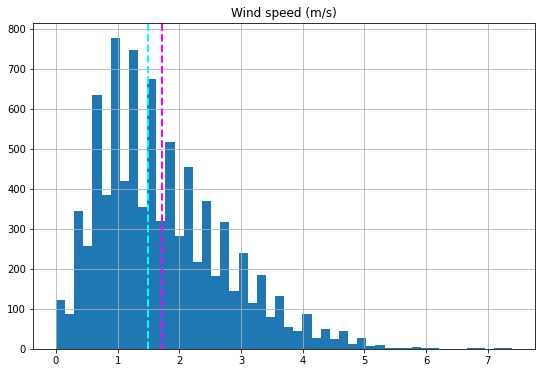

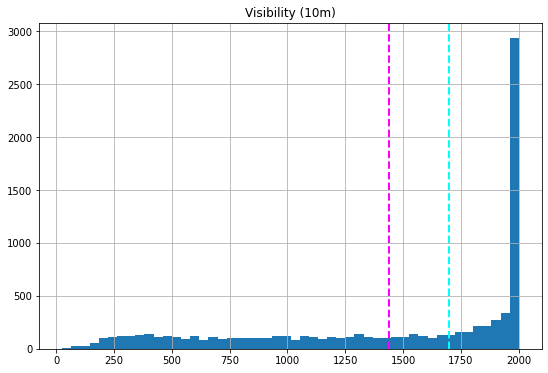

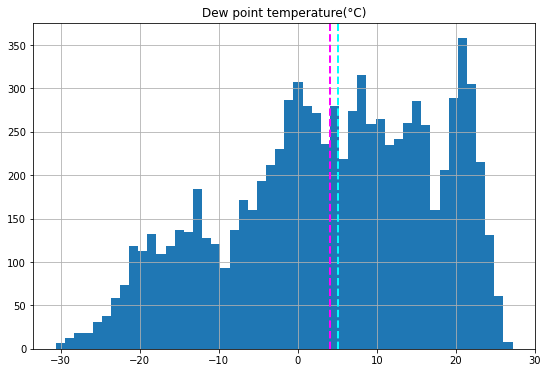

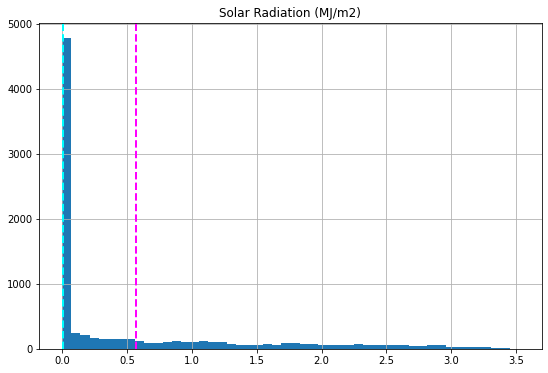

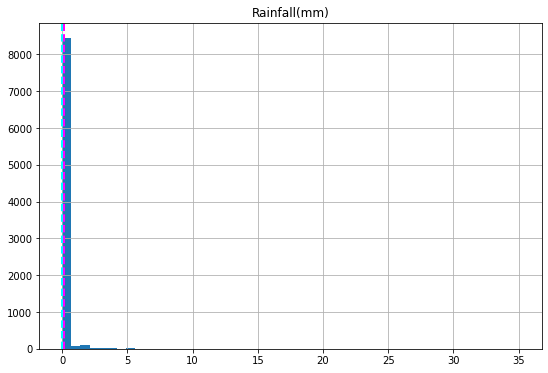

In [226]:
from seaborn.distributions import kdeplot
for col in numeric_features[2:-2]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
      
       
    ax.set_title(col)
    
plt.show()


In [230]:
right_skewed=['Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Rainfall(mm)']
left_skewed=['Visibility (10m)', 'Dew point temperature(°C)']

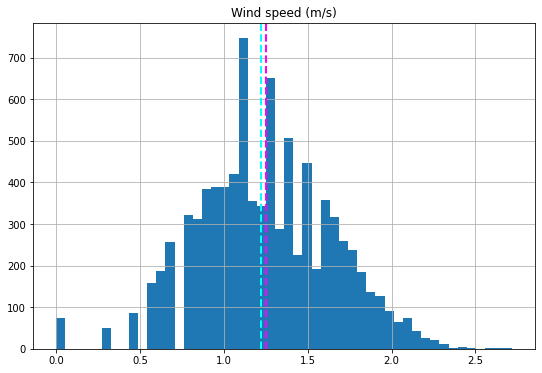

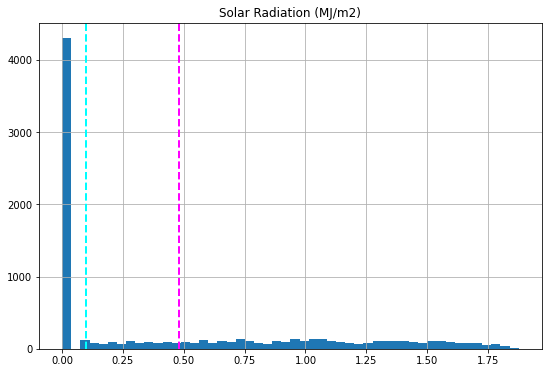

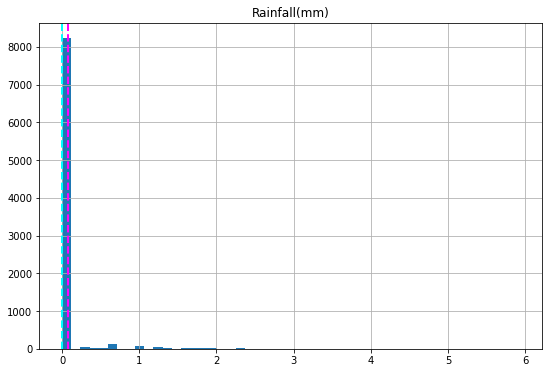

In [229]:
for col in right_skewed:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

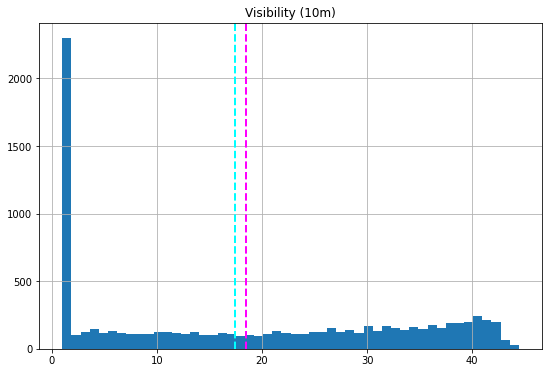

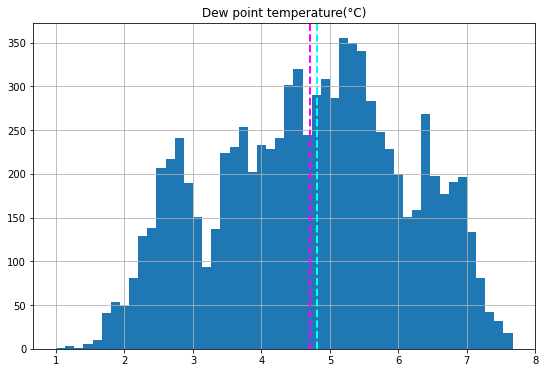

In [233]:
for col in left_skewed:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = np.sqrt(max(df[col]+1) - df[col])
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

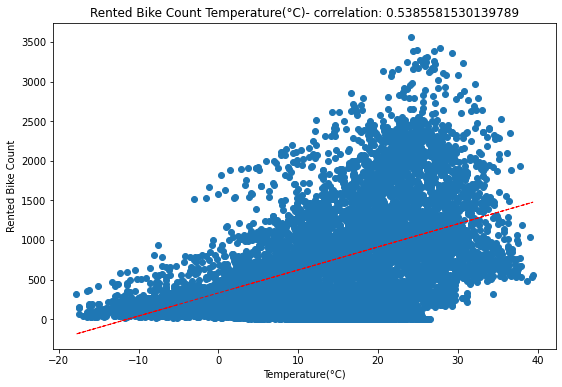

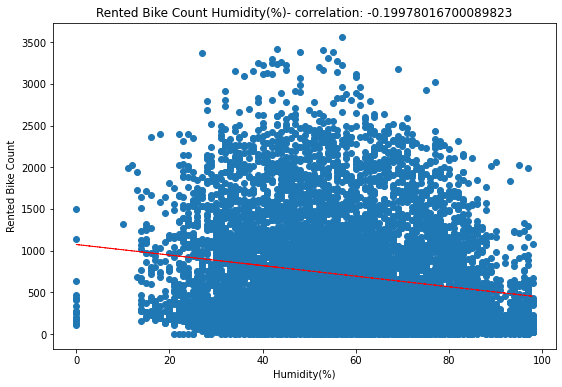

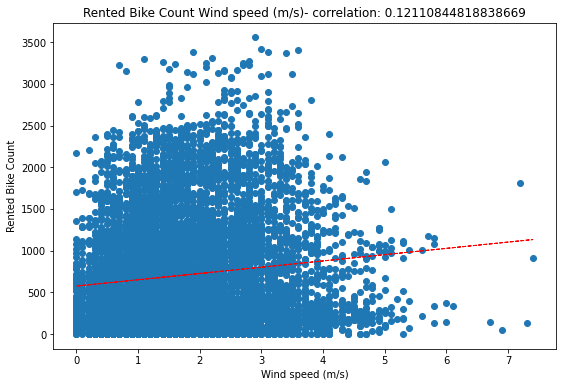

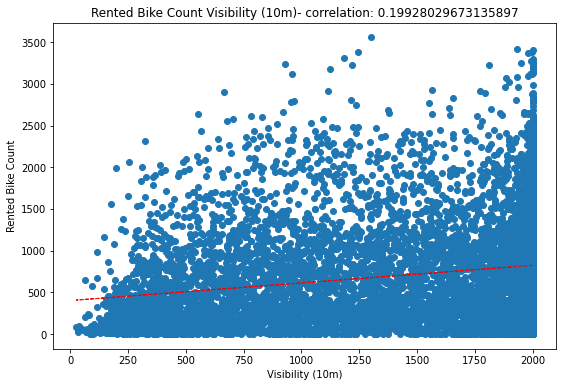

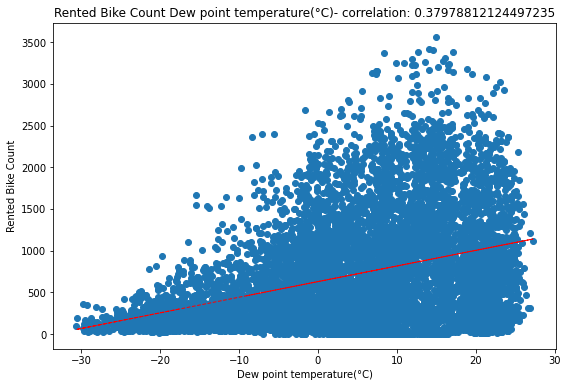

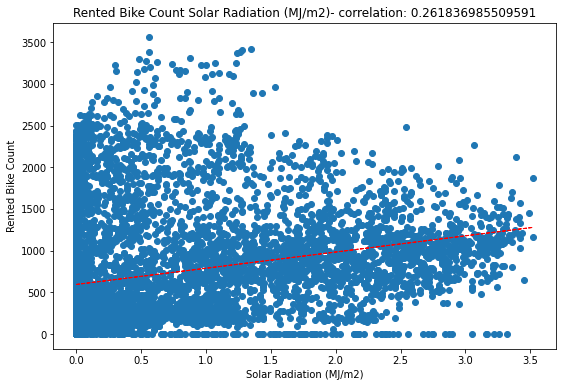

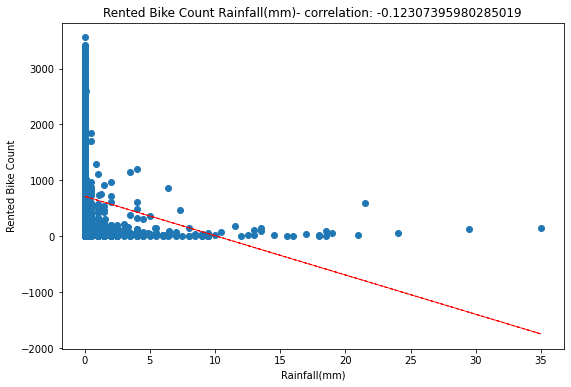

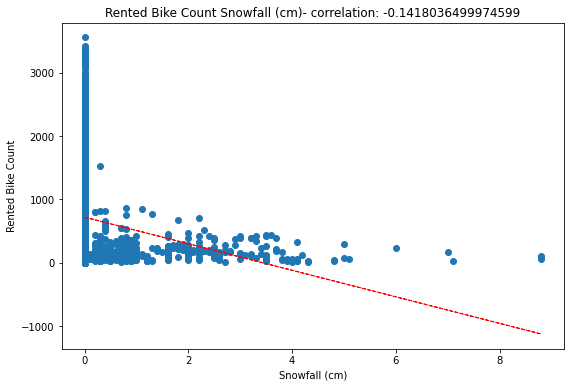

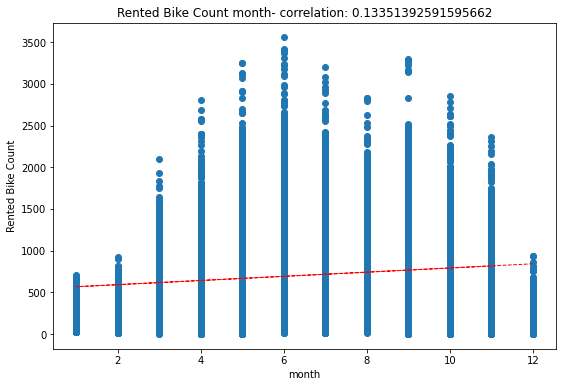

In [169]:
for col in numeric_features[2:]:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Rented Bike Count']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
 
   plt.ylabel('Rented Bike Count')
   ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Rented Bike Count'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

In [170]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [171]:
len(df[df['Rented Bike Count']==0])

295

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


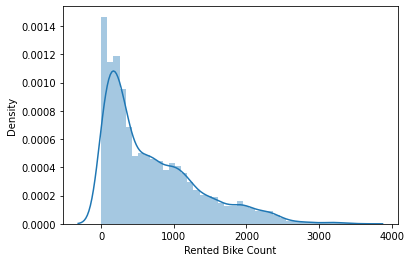

In [172]:
sns.distplot(df['Rented Bike Count'],hist=True)

In [173]:
df['Rented Bike Count']=np.where(df['Rented Bike Count']==0,1,df['Rented Bike Count'])

In [174]:
len(df[df['Rented Bike Count']==1])

295

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


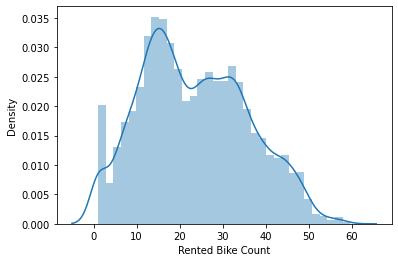

In [175]:
sns.distplot(np.sqrt(df['Rented Bike Count']),hist=True)

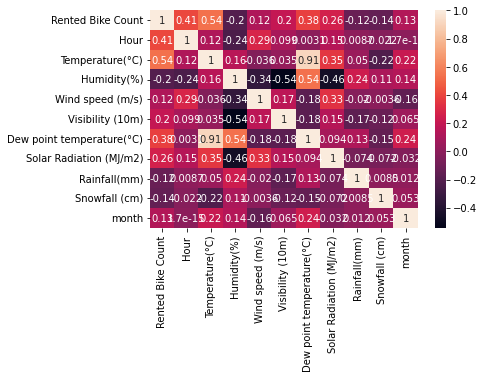

In [176]:
sns.heatmap(df[numeric_features].corr(),annot=True)

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [178]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.425156
1,Temperature(°C),34.345199
2,Humidity(%),6.776495
3,Wind speed (m/s),4.877759
4,Visibility (10m),9.356009
5,Dew point temperature(°C),17.435051
6,Solar Radiation (MJ/m2),2.882197
7,Rainfall(mm),1.081894
8,Snowfall (cm),1.131825
9,month,5.093120


In [179]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Temperature(°C)','Dew point temperature(°C)','Rented Bike Count']]])

,variables,VIF
0,Hour,3.890690
1,Humidity(%),5.128209
2,Wind speed (m/s),4.461240
3,Visibility (10m),5.338879
4,Solar Radiation (MJ/m2),1.749875
5,Rainfall(mm),1.079212
6,Snowfall (cm),1.054868
7,month,4.915092


In [180]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Temperature(°C)','Dew point temperature(°C)','Rented Bike Count','Visibility (10m)','Humidity(%)']]])

,variables,VIF
0,Hour,3.579718
1,Wind speed (m/s),3.601347
2,Solar Radiation (MJ/m2),1.629981
3,Rainfall(mm),1.021807
4,Snowfall (cm),1.038179
5,month,2.578615


In [181]:
independent_features=['month','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

In [182]:
categorical_data=df.describe(include=['object']).columns.tolist()

In [183]:
categorical_data

['Seasons', 'Holiday', 'Functioning Day']

In [184]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [185]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month'],
      dtype='object')

In [186]:
df.groupby('Functioning Day').aggregate({'Rented Bike Count':['mean','max','min']})

Rented Bike Count          
                             mean   max min
Functioning Day                            
No                       1.000000     1   1
Yes                    729.156999  3556   2

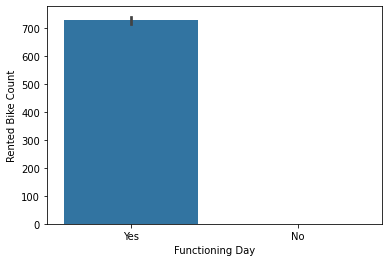

In [187]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)

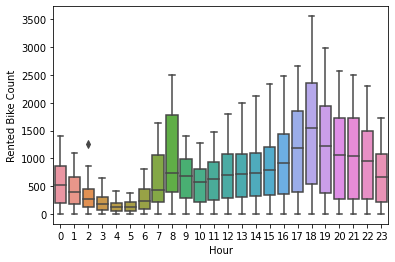

In [188]:
sns.boxplot(x='Hour',y='Rented Bike Count',data=df)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

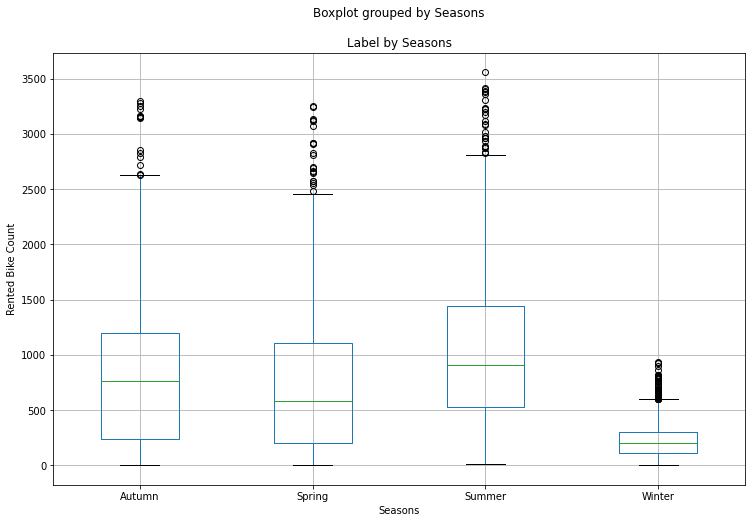

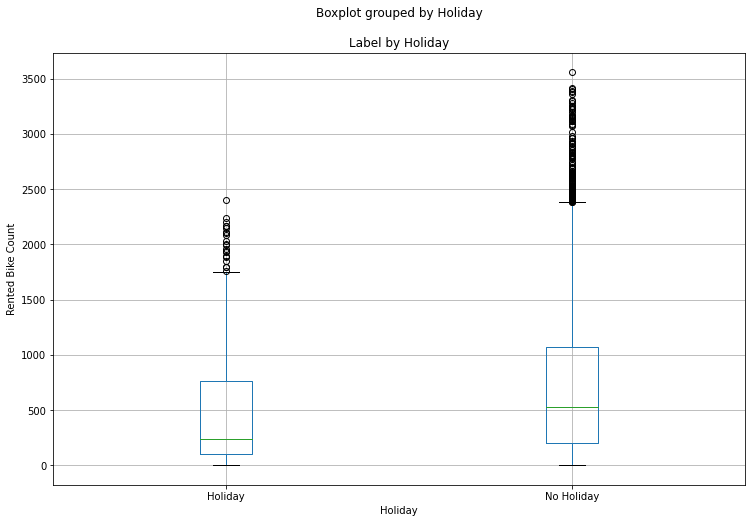

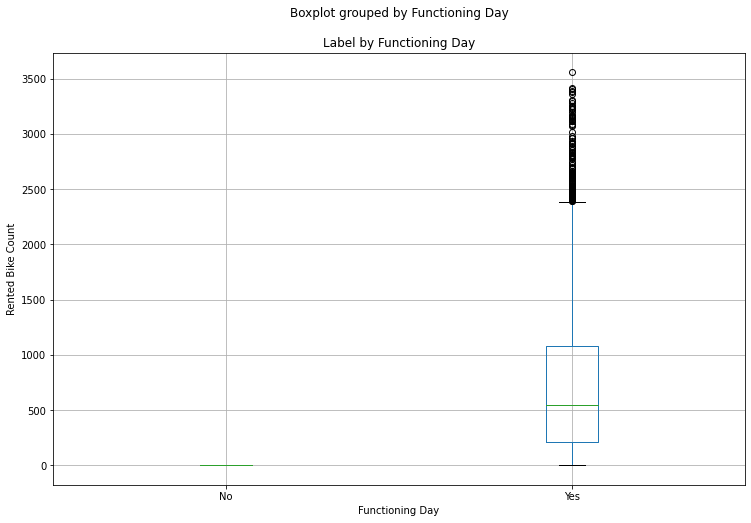

In [189]:
for col in categorical_data:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [190]:
def zscore(series): 
    return (series-series.mean())/series.std()

df['count_zscore'] = df.groupby(['Hour'])['Rented Bike Count'].transform(zscore)
outlier_idx = np.abs(df['count_zscore'])>3
outlier_data = df.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (3, 16)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,count_zscore
4660,2018-06-13,421,4,18.7,74,0.9,1933,13.9,0.0,0.0,0.0,Summer,No Holiday,Yes,6,3.196335
4922,2018-06-24,1254,2,20.9,87,1.8,222,18.6,0.0,0.0,0.0,Summer,No Holiday,Yes,6,4.533762
4923,2018-06-24,644,3,20.6,91,0.8,194,19.0,0.0,0.0,0.0,Summer,No Holiday,Yes,6,3.078057
